In [ ]:
In this section, we import all the necessary **Python libraries** required for data analysis, visualization, machine learning model development, and model explainability.

###  Core Libraries
- **pandas** → For data manipulation and analysis  
- **numpy** → For numerical operations and handling arrays  
- **matplotlib** & **seaborn** → For data visualization

### Data Preprocessing and Evaluation
- **train_test_split** → To split the dataset into training and testing sets  
- **LabelEncoder** → To encode categorical variables into numeric format  
- **StandardScaler** → To scale features for better model performance  
- **accuracy_score**, **classification_report** → To evaluate the model’s accuracy and performance

###  Machine Learning Algorithms
- **LogisticRegression** → For linear classification tasks  
- **KNeighborsClassifier** → For instance-based learning (KNN)  
- **DecisionTreeClassifier** → For tree-based classification  
- **RandomForestClassifier** → Ensemble learning using multiple decision trees  
- **StackingClassifier** → Combines multiple models (meta-ensemble approach)  
- **SVC** → Support Vector Machine for classification  
- **KMeans** → Unsupervised learning (clustering)

### Model Explainability
- **SHAP (SHapley Additive exPlanations)** → For interpreting and visualizing the impact of each feature on the model’s output

In [ ]:
#1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans

# For Explainability
import shap

2.loaded the Titanic dataset and displayed the first 5 rows to see the data

In [40]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\Titanic-Dataset.csv")
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [41]:
df.shape

(891, 12)

In [42]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 3. Data Preprocessing
# Fill missing values

I filled missing Age and Fare values with the median so the dataset has no blanks

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])



# Feature Engineering: extract title from Name


extracted the title (Mr, Mrs, etc.) from the Name and group all uncommon titles as ‘Rare’ to simplify the data

In [45]:
# Extract Title from Name (use raw string for regex)
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Replace rare titles with "Rare"
df['Title'] = df['Title'].replace(
    ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],
    'Rare'
)

 Combined family-related information into a single feature, FamilySize.

In [46]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)


take the first letter of the Cabin to represent the deck and mark missing cabins as ‘U’ for unknown

In [47]:
df['CabinLetter'] = df['Cabin'].fillna('U').astype(str).str[0]


KMeans groups similar passengers and assigns each a cluster number for use in prediction

In [48]:
features_for_cluster = df[['Age','Fare','Pclass','FamilySize']].fillna(0)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_for_cluster)


converedt text columns like Sex, Embarked, Title, and CabinLetter into numbers using LabelEncoder so the model can process them.

In [49]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df['Title'] = le.fit_transform(df['Title'])
df['CabinLetter'] = le.fit_transform(df['CabinLetter'])

In [50]:
df.drop(columns=['Name','Ticket','PassengerId','Cabin'], inplace=True)


In [51]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'FamilySize', 'IsAlone', 'CabinLetter', 'Cluster'],
      dtype='object')

We split the data into features (X) and target (y), then into training and testing sets.
After that, we scaled the features using StandardScaler so all values are on the same range for better model performance.”

In [52]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.8101
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


KNN Accuracy: 0.8212
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       105
           1       0.78      0.80      0.79        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179


Decision Tree Accuracy: 0.7654
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       105
           1       0.69      0.78      0.73        74

    accuracy                           0.77       179
   macro avg       0.76      0.77   

I trained five different models — Logistic Regression, KNN, Decision Tree, Random Forest, and SVM — on the training data.
Then, I tested them on the test set and checked their accuracy, precision, recall, and F1-score to compare performance

In [54]:
estimators = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(kernel='linear', probability=True))
]

stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=SVC(kernel='linear', probability=True)
)


In [55]:
stack_model.fit(X_train, y_train)
stack_acc = stack_model.score(X_test, y_test)
results["Stacking Ensemble"] = stack_acc

print(f"\nStacking Ensemble Accuracy: {stack_acc:.4f}")


Stacking Ensemble Accuracy: 0.8324


Stacking is like a team of models working together:

Each base model makes a prediction.

The final SVM model looks at all their predictions and decides the final output.

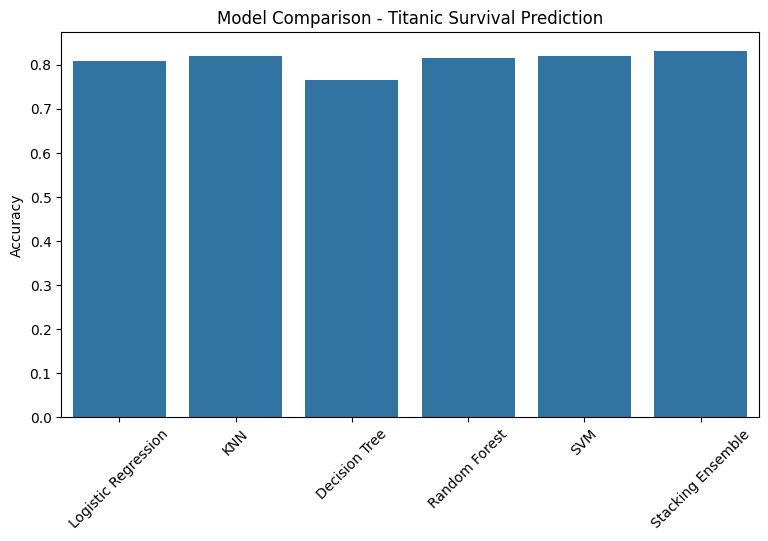

In [56]:
plt.figure(figsize=(9,5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("Accuracy")
plt.title("Model Comparison - Titanic Survival Prediction")
plt.xticks(rotation=45)
plt.show()